<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap10/10_3_2D_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 10.3: 2D Convolution**

This notebook investigates the 2D convolution operation.  It asks you to hand code the convolution so we can be sure that we are computing the same thing as in PyTorch.  The next notebook uses the convolutional layers in PyTorch directly.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import torch
# Set to print in reasonable form
np.set_printoptions(precision=3, floatmode="fixed")
torch.set_printoptions(precision=3)

This routine performs convolution in PyTorch

In [2]:
# Perform convolution in PyTorch
def conv_pytorch(image, conv_weights, stride=1, pad =1):
  # Convert image and kernel to tensors
  image_tensor = torch.from_numpy(image) # (batchSize, channelsIn, imageHeightIn, =imageWidthIn)
  conv_weights_tensor = torch.from_numpy(conv_weights) # (channelsOut, channelsIn, kernelHeight, kernelWidth)
  # Do the convolution
  output_tensor = torch.nn.functional.conv2d(image_tensor, conv_weights_tensor, stride=stride, padding=pad)
  # Convert back from PyTorch and return
  return(output_tensor.numpy()) # (batchSize channelsOut imageHeightOut imageHeightIn)

First we'll start with the simplest 2D convolution.  Just one channel in and one channel out.  A single image in the batch.

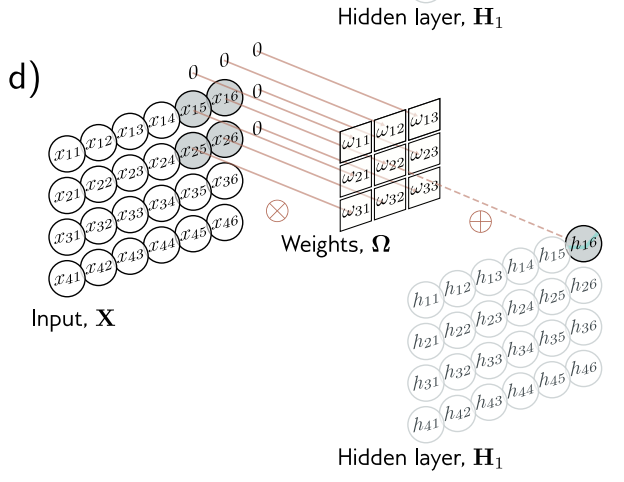

In [70]:
# Perform convolution in numpy
def conv_numpy_1(image, weights, pad=1):

    # Perform zero padding
    if pad != 0:
        image = np.pad(image, ((0, 0), (0 ,0), (pad, pad), (pad, pad)),'constant')

    # Get sizes of image array and kernel weights
    batchSize,  channelsIn, imageHeightIn, imageWidthIn = image.shape
    channelsOut, channelsIn, kernelHeight, kernelWidth = weights.shape

    # Get size of output arrays
    imageHeightOut = np.floor(1 + imageHeightIn - kernelHeight).astype(int)
    imageWidthOut = np.floor(1 + imageWidthIn - kernelWidth).astype(int)

    # Create output
    out = np.zeros((batchSize, channelsOut, imageHeightOut, imageWidthOut), dtype=np.float32)

    # !!!!!! NOTE THERE IS A SUBTLETY HERE !!!!!!!!
    # I have padded the image with zeros above, so it is surrouned by a "ring" of zeros
    # That means that the image indexes are all off by one
    # This actually makes your code simpler
    printed = 0 
    for c_y in range(imageHeightOut):
      for c_x in range(imageWidthOut):
        for c_kernel_y in range(kernelHeight):
          for c_kernel_x in range(kernelWidth):
            # TODO -- Retrieve the image pixel and the weight from the convolution
            # Only one image in batch, one input channel and one output channel, so these indices should all be zero
            # Replace the two lines below
              
            # if not printed:
            #     print(f"we hava matrix \n{image}\n and weights \n{weights}")
            #     printed = 1
            this_pixel_value = image[0, 0, c_y+c_kernel_y, c_x+c_kernel_x]
            this_weight = weights[0, 0, c_kernel_y, c_kernel_x]

            # Multiply these together and add to the output at this position
            out[0, 0, c_y, c_x] += np.sum(this_pixel_value * this_weight)


    return out

In [71]:
# Set random seed so we always get same answer
np.random.seed(1)
n_batch = 1
image_height = 4
image_width = 6
channels_in = 1
kernel_size = 3
channels_out = 1

# Create random input image
input_image= np.random.normal(size=(n_batch, channels_in, image_height, image_width))
# Create random convolution kernel weights
conv_weights = np.random.normal(size=(channels_out, channels_in, kernel_size, kernel_size))
# testing
# input_image = np.array([[[[1,1,1,1], [1,1,1,1], [1,1,1,1], [1,1,1,1]]]])
# conv_weights = np.array([[[[1,2,3], [1,2,3], [-1, -2, -3]]]])
# Perform convolution using PyTorch
conv_results_pytorch = conv_pytorch(input_image, conv_weights, stride=1, pad=1)
print("PyTorch Results")
print(conv_results_pytorch)

# Perform convolution in numpy
print("Your results")
conv_results_numpy = conv_numpy_1(input_image, conv_weights)
print(conv_results_numpy)

PyTorch Results
[[[[-0.929 -2.760  0.716  0.114  0.560 -0.387]
   [-1.515  0.283  1.008  0.466 -1.094  2.004]
   [-1.634  3.555 -2.154 -0.892 -1.856  2.299]
   [ 0.565 -0.947 -0.629  2.996 -1.811 -0.533]]]]
Your results
[[[[-0.929 -2.760  0.716  0.114  0.560 -0.387]
   [-1.515  0.283  1.008  0.466 -1.094  2.004]
   [-1.634  3.555 -2.154 -0.892 -1.856  2.299]
   [ 0.565 -0.947 -0.629  2.996 -1.811 -0.533]]]]


Let's now add in the possibility of using different strides

In [93]:
# Perform convolution in numpy
def conv_numpy_2(image, weights, stride=1, pad=1):

    # Perform zero padding
    if pad != 0:
        image = np.pad(image, ((0, 0), (0 ,0), (pad, pad), (pad, pad)),'constant')

    # Get sizes of image array and kernel weights
    batchSize,  channelsIn, imageHeightIn, imageWidthIn = image.shape
    channelsOut, channelsIn, kernelHeight, kernelWidth = weights.shape

    # Get size of output arrays
    imageHeightOut = np.floor(1 + (imageHeightIn - kernelHeight) / stride).astype(int)
    imageWidthOut = np.floor(1 + (imageWidthIn - kernelWidth) / stride).astype(int)

    # Create output
    out = np.zeros((batchSize, channelsOut, imageHeightOut, imageWidthOut), dtype=np.float32)

    for c_y in range(imageHeightOut):
      for c_x in range(imageWidthOut):
        for c_kernel_y in range(kernelHeight):
          for c_kernel_x in range(kernelWidth):
            # TODO -- Retrieve the image pixel and the weight from the convolution
            # Only one image in batch, one input channel and one output channel, so these indices should all be zero
            # Replace the two lines below

            this_pixel_value = image[0, 0, c_kernel_y+stride * c_y, c_kernel_x+stride * c_x]
            this_weight = weights[0, 0, c_kernel_y, c_kernel_x]

            # Multiply these together and add to the output at this position
            out[0, 0, c_y, c_x] += np.sum(this_pixel_value * this_weight)

    return out

In [92]:
# Set random seed so we always get same answer
np.random.seed(1)
n_batch = 1
image_height = 12
image_width = 10
channels_in = 1
kernel_size = 3
channels_out = 1
stride = 2

# Create random input image
input_image= np.random.normal(size=(n_batch, channels_in, image_height, image_width))
# Create random convolution kernel weights
conv_weights = np.random.normal(size=(channels_out, channels_in, kernel_size, kernel_size))

# Perform convolution using PyTorch
conv_results_pytorch = conv_pytorch(input_image, conv_weights, stride, pad=1)
print("PyTorch Results")
print(conv_results_pytorch)

# Perform convolution in numpy
print("Your results")
conv_results_numpy = conv_numpy_2(input_image, conv_weights, stride, pad=1)
print(conv_results_numpy)

PyTorch Results
[[[[-0.809 -4.550 -5.486 -9.506 -4.512]
   [-0.055  1.145 -5.388 -3.910  0.097]
   [-0.186  0.660  1.630  2.275  4.874]
   [ 2.386 -0.225  3.288 -4.239 -1.403]
   [ 0.825  1.710 -3.246  3.246  1.709]
   [ 0.809  3.695  3.491 -2.113 -2.714]]]]
Your results
[[[[-0.809 -4.550 -5.486 -9.506 -4.512]
   [-0.055  1.145 -5.388 -3.910  0.097]
   [-0.186  0.660  1.630  2.275  4.874]
   [ 2.386 -0.225  3.288 -4.239 -1.403]
   [ 0.825  1.710 -3.246  3.246  1.709]
   [ 0.809  3.695  3.491 -2.113 -2.714]]]]


Now we'll introduce multiple input and output channels

In [94]:
# Perform convolution in numpy
def conv_numpy_3(image, weights, stride=1, pad=1):

    # Perform zero padding
    if pad != 0:
        image = np.pad(image, ((0, 0), (0 ,0), (pad, pad), (pad, pad)),'constant')

    # Get sizes of image array and kernel weights
    batchSize,  channelsIn, imageHeightIn, imageWidthIn = image.shape
    channelsOut, channelsIn, kernelHeight, kernelWidth = weights.shape

    # Get size of output arrays
    imageHeightOut = np.floor(1 + (imageHeightIn - kernelHeight) / stride).astype(int)
    imageWidthOut = np.floor(1 + (imageWidthIn - kernelWidth) / stride).astype(int)

    # Create output
    out = np.zeros((batchSize, channelsOut, imageHeightOut, imageWidthOut), dtype=np.float32)

    for c_y in range(imageHeightOut):
      for c_x in range(imageWidthOut):
        for c_channel_out in range(channelsOut):
          for c_channel_in in range(channelsIn):
            for c_kernel_y in range(kernelHeight):
              for c_kernel_x in range(kernelWidth):
                  # TODO -- Retrieve the image pixel and the weight from the convolution
                  # Only one image in batch so this index should be zero
                  # Replace the two lines below
                  this_pixel_value = image[0, c_channel_in, c_kernel_y+stride * c_y, c_kernel_x+stride * c_x]
                  this_weight = weights[c_channel_out, c_channel_in, c_kernel_y, c_kernel_x]

                  # Multiply these together and add to the output at this position
                  out[0, c_channel_out, c_y, c_x] += np.sum(this_pixel_value * this_weight)
    return out

In [95]:
# Set random seed so we always get same answer
np.random.seed(1)
n_batch = 1
image_height = 4
image_width = 6
channels_in = 5
kernel_size = 3
channels_out = 2

# Create random input image
input_image= np.random.normal(size=(n_batch, channels_in, image_height, image_width))
# Create random convolution kernel weights
conv_weights = np.random.normal(size=(channels_out, channels_in, kernel_size, kernel_size))

# Perform convolution using PyTorch
conv_results_pytorch = conv_pytorch(input_image, conv_weights, stride=1, pad=1)
print("PyTorch Results")
print(conv_results_pytorch)

# Perform convolution in numpy
print("Your results")
conv_results_numpy = conv_numpy_3(input_image, conv_weights, stride=1, pad=1)
print(conv_results_numpy)

PyTorch Results
[[[[ -0.785   5.463  -2.480   5.026  -3.594   7.785]
   [ -6.744   2.534  -0.664   7.149  -9.839   7.849]
   [ -4.794  14.074  -1.060   2.706 -10.182   2.004]
   [  1.809   0.287   4.648  -1.840   3.259   1.073]]

  [[  4.150   5.372   1.699   0.500   0.589   4.361]
   [ -4.123   5.136   4.677  -3.895  -4.990   2.546]
   [  3.991   5.768  -2.315   8.473   1.752   2.766]
   [  1.529   0.318  11.518  -5.444  -2.293   1.270]]]]
Your results
[[[[ -0.785   5.463  -2.480   5.026  -3.594   7.785]
   [ -6.744   2.534  -0.664   7.149  -9.839   7.849]
   [ -4.794  14.074  -1.060   2.706 -10.182   2.004]
   [  1.809   0.287   4.648  -1.840   3.259   1.073]]

  [[  4.150   5.372   1.699   0.500   0.589   4.361]
   [ -4.123   5.136   4.677  -3.895  -4.990   2.546]
   [  3.991   5.768  -2.315   8.473   1.752   2.766]
   [  1.529   0.318  11.518  -5.444  -2.293   1.270]]]]


Now we'll do the full convolution with multiple images (batch size > 1), and multiple input channels, multiple output channels.

In [97]:
# Perform convolution in numpy
def conv_numpy_4(image, weights, stride=1, pad=1):

    # Perform zero padding
    if pad != 0:
        image = np.pad(image, ((0, 0), (0 ,0), (pad, pad), (pad, pad)),'constant')

    # Get sizes of image array and kernel weights
    batchSize,  channelsIn, imageHeightIn, imageWidthIn = image.shape
    channelsOut, channelsIn, kernelHeight, kernelWidth = weights.shape

    # Get size of output arrays
    imageHeightOut = np.floor(1 + (imageHeightIn - kernelHeight) / stride).astype(int)
    imageWidthOut = np.floor(1 + (imageWidthIn - kernelWidth) / stride).astype(int)

    # Create output
    out = np.zeros((batchSize, channelsOut, imageHeightOut, imageWidthOut), dtype=np.float32)

    for c_batch in range(batchSize):
      for c_y in range(imageHeightOut):
        for c_x in range(imageWidthOut):
          for c_channel_out in range(channelsOut):
            for c_channel_in in range(channelsIn):
              for c_kernel_y in range(kernelHeight):
                for c_kernel_x in range(kernelWidth):
                    # TODO -- Retrieve the image pixel and the weight from the convolution
                    # Replace the two lines below
                    this_pixel_value = image[c_batch, c_channel_in, c_kernel_y+stride * c_y, c_kernel_x+stride * c_x]
                    this_weight = weights[c_channel_out, c_channel_in, c_kernel_y, c_kernel_x]



                    # Multiply these together and add to the output at this position
                    out[c_batch, c_channel_out, c_y, c_x] += np.sum(this_pixel_value * this_weight)
    return out

In [98]:
# Set random seed so we always get same answer
np.random.seed(1)
n_batch = 2
image_height = 4
image_width = 6
channels_in = 5
kernel_size = 3
channels_out = 2

# Create random input image
input_image= np.random.normal(size=(n_batch, channels_in, image_height, image_width))
# Create random convolution kernel weights
conv_weights = np.random.normal(size=(channels_out, channels_in, kernel_size, kernel_size))

# Perform convolution using PyTorch
conv_results_pytorch = conv_pytorch(input_image, conv_weights, stride=1, pad=1)
print("PyTorch Results")
print(conv_results_pytorch)

# Perform convolution in numpy
print("Your results")
conv_results_numpy = conv_numpy_4(input_image, conv_weights, stride=1, pad=1)
print(conv_results_numpy)

PyTorch Results
[[[[ -3.633  -1.644   0.169  -1.167  -3.865   6.045]
   [ -9.004   7.303   4.414   0.361  -6.739   3.939]
   [ -1.391  13.502   3.807  -9.379   3.991   5.442]
   [  2.805   6.874  -9.287  -4.468  -1.501   4.607]]

  [[  1.940  -1.410   2.397  -0.235  -0.394  -1.483]
   [  5.049  -3.335  -7.596  -1.586   3.049  -1.857]
   [  3.514   0.475  -1.952  -1.291  -0.589  -0.948]
   [  6.524  -0.020  -3.298  -1.248   3.249  -2.680]]]


 [[[  4.154  -4.764  11.635   0.506  -4.012  -2.081]
   [ -1.125  -0.677  16.749  -7.030  -5.978  -2.629]
   [  0.778  -3.984 -10.284   1.575  -8.888   1.163]
   [  0.556  -2.290   1.407  -3.088   2.227  -5.403]]

  [[  1.048   4.322  -0.901  -5.820   3.998   2.281]
   [ -1.313   8.409  -0.100  14.625   1.223  -3.572]
   [  1.411   1.617  -4.078  -8.107   3.705   0.229]
   [ -3.540  -5.292  -5.619  -4.039  -4.048  -3.446]]]]
Your results
[[[[ -3.633  -1.644   0.169  -1.167  -3.865   6.045]
   [ -9.004   7.303   4.414   0.361  -6.739   3.939]
   [ -